### Import

In [1]:
from astrosceni.image import Image
from astrosceni.stars_filter import StarsFilter
from astrosceni.mufinder import MuFinder
from matplotlib import pyplot as plt
import numpy as np

# Image Class

### Importing images and cropping them

In [2]:
nb = Image('data/bs_h_ave_wcs.fits')
bb = Image('data/bs_r_ave_wcs.fits')

nb.cropPixels(50, -50, 50, -50)
bb.cropPixels(50, -50, 50, -50)

FileNotFoundError: [Errno 2] No such file or directory: '/home/joshua_ong/data/bs_h_ave_wcs.fits'

### Check and remove saturated pixels

In [ ]:
print(nb.checkSaturatedPixelCount(saturated_ratio_lim=0.001))
nb.setSaturatedPixelsToNan()
print(nb.checkSaturatedPixelCount(saturated_ratio_lim=0.001))

110
0


### Test loading another image

1976760


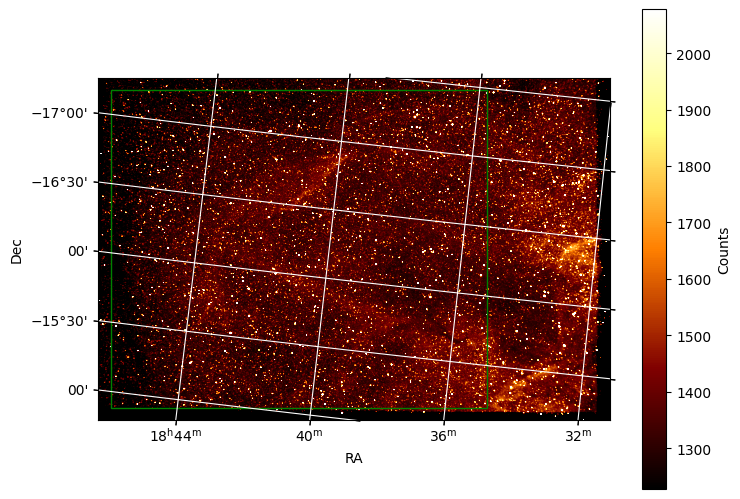

2558160


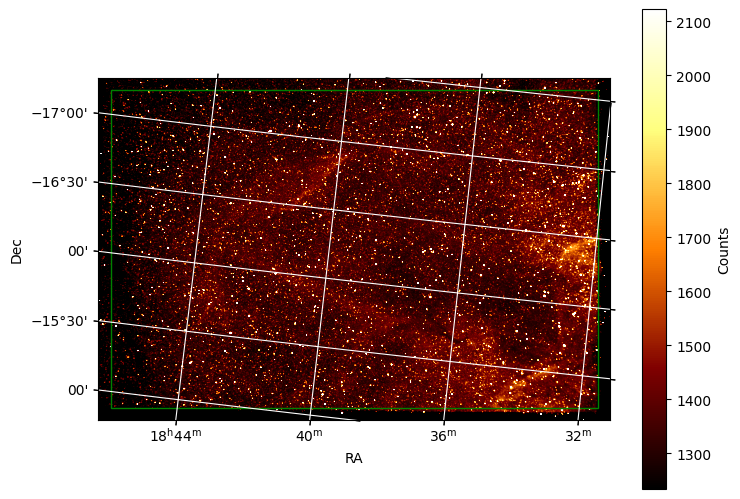

In [ ]:
nb = Image('data/bs_h_ave_wcs.fits')
# nb.cropCoords(dec_start='-13d', ra_start='18h28m')
nb.cropPixels(50, -500, 50, -50)
nb.plot(showCropped=True, croppedBorder='green', original=True)
nb.cropPixels(50, -50, 50, -50)
nb.plot(showCropped=True, croppedBorder='green')

nb.setSaturatedPixelsToNan()
bb.setSaturatedPixelsToNan()


### Testing plotting labelled stars

Previous saved catalog file found.
               RA        DEC   Vmag     x_pixels     y_pixels
90751  277.959867 -15.182680   7.29  1169.918172     0.528651
90805  278.088825 -16.222659   8.39  1160.516895   588.426214
90814  278.113751 -15.932036   8.32  1130.262945   427.729570
90824  278.157473 -15.701639   7.85  1093.353075   301.671428
90856  278.258437 -16.560188   6.97  1089.210879   786.195650
90935  278.508625 -17.540027   8.48  1013.369692  1345.981225
91029  278.782845 -16.985536   7.10   834.138862  1052.934468
91048  278.835813 -16.140804   7.76   755.030824   585.727305
91163  279.174414 -17.206821   7.84   638.988295  1198.613540
91168  279.198003 -15.945465   7.01   549.156324   498.264763
91260  279.464871 -17.231285   6.78   486.061893  1229.167575
91331  279.653249 -16.310071   7.75   328.299083   728.286179
91365  279.760498 -15.039268   7.48   191.204176    27.595256
91498  280.137948 -16.999957  10.66   113.933171  1140.801701
               RA        DEC   Vmag

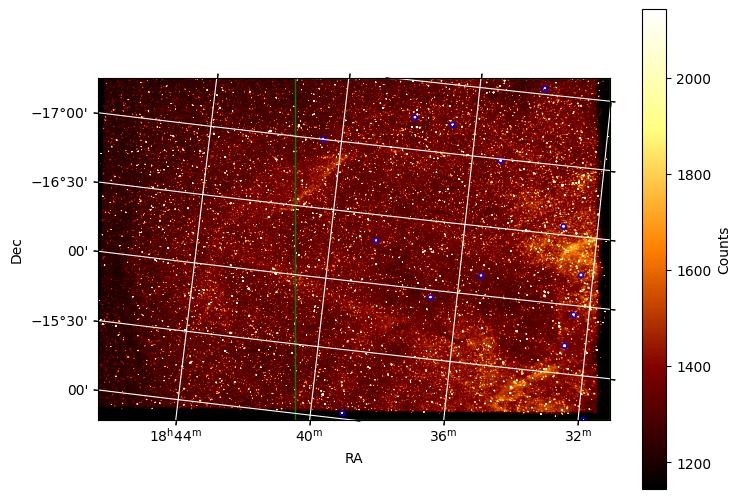

In [ ]:
nb.cropPixels(x_start = 800)

filter = StarsFilter(data_directory_path="data")
filter.setStarsInRegion(nb)
print(filter.getStarsInRegion())
filter.setVisibleStars(nb)
print(filter.getVisibleStars())
nb.setLabeledStars(filter)

nb.plot(showCropped=True, croppedBorder='green', showLabeledStars=True)

### Testing Zoom Function

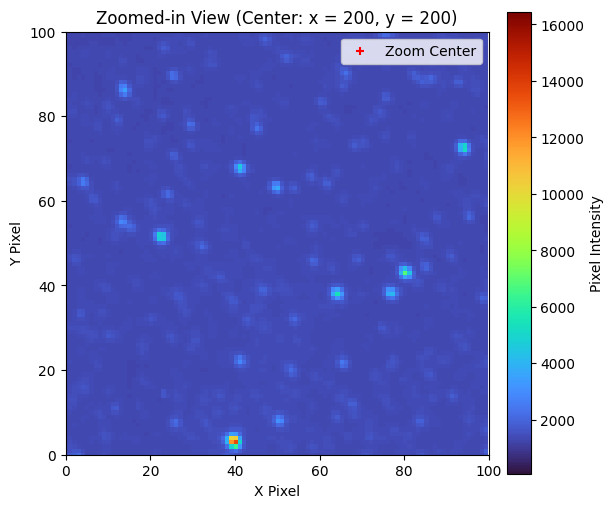

In [ ]:
#Zooms into the point (200, 200) in x-y pixels
nb.zoomToPoint(x = 200, y = 200, custom_cmap = 'turbo')

### Testing getBounds

In [ ]:
bl, br, tl, tr =nb.getBounds()
print(bl.to_string(style = 'hmsdms'))

18h40m25.46016041s -14d57m04.905669s


### Testing Subtractor

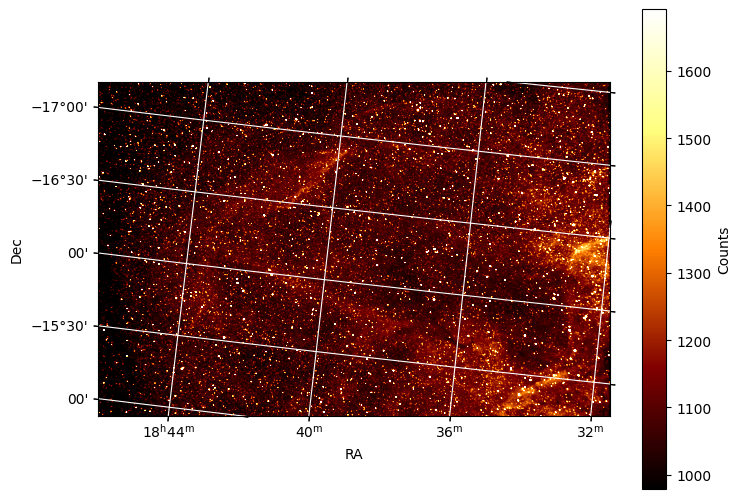

In [ ]:
nb.cropPixels(50, -50, 50, -50)
bb.cropPixels(50, -50, 50, -50)

subtracted_image = Image.subtract(nb, bb, mu = 0.5)
subtracted_image.plot()

### Test Histogram plotting

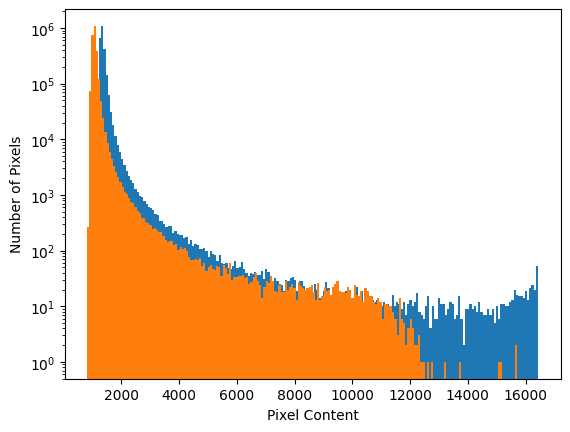

In [ ]:
nb.plotHist()
subtracted_image.plotHist()

### Testing MuFinder constructor and finding optimal mus

In [ ]:
finder = MuFinder(nb, bb, mu_resolution=0.01, mu_range=(1, 2))


### Plotting the skewness vs mu plot

[np.float64(18.11899485999991), np.float64(18.006212211486766), np.float64(17.88514921239798), np.float64(17.75521948618824), np.float64(17.615811969894583), np.float64(17.466290929043048), np.float64(17.305996092204218), np.float64(17.13424291703844), np.float64(16.950322999962914), np.float64(16.75350464177651), np.float64(16.54303358166742), np.float64(16.3181339120003), np.float64(16.078009186101685), np.float64(15.821843730927894), np.float64(15.548804175987613), np.float64(15.258041209180101), np.float64(14.948691569289743), np.float64(14.61988028372829), np.float64(14.270723158723676), np.float64(13.900329527511042), np.float64(13.507805260174608), np.float64(13.092256036615394), np.float64(12.652790881678794), np.float64(12.188525958772292), np.float64(11.698588615342148), np.float64(11.182121670383937), np.float64(10.638287930745008), np.float64(10.066274919379627), np.float64(9.4652997949655), np.float64(8.834614438436189), np.float64(8.173510678072926), np.float64(7.48132562

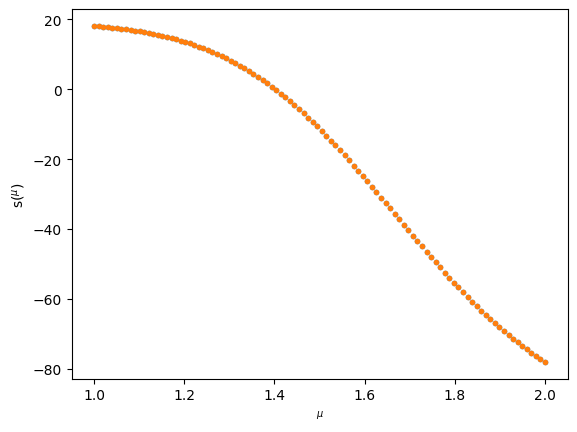

In [ ]:
finder.plotSkewnessVals()
# plt.axvline(finder.getOptimalMus()[0])
finder.plotSkewnessVals()
print(finder.getSkewnessVals())

print(finder.skewness_vals)
print(finder.mu_linspace[np.argmin(np.abs(finder.skewness_vals))])


### Getting images from mufinder and plotting them with contours

In [ ]:
images = finder.getResultImages()
images[0].setSaturatedPixelsToNan()
plt.show()
images[0].plot(cmap='turbo')
images[0].plotContour(sigma = 9, overlay=True, base_cmap='turbo', alpha=1)


IndexError: list index out of range

# Stars Filter Class

### Test setting a catalogue, either default or custom

In [ ]:
hipparcus_filter = StarsFilter(data_directory_path="data") #Default
tycho_filter = StarsFilter(data_directory_path="data") #Custom

hipparcus_filter.setCatalogue(star_id_col_name = "HIP")
print(hipparcus_filter.getCatalogue())
tycho_filter.setCatalogue(catalogue_id="I/259/tyc2", star_id_col_name = "TYC", ra_col_name="RA(ICRS)", dec_col_name="DE(ICRS)", app_mag_col_name="VTmag")
print(tycho_filter.getCatalogue())

Previous saved catalog file found.
                RA        DEC  Vmag
0         0.000899   1.089009  9.10
1         0.004265 -19.498840  9.27
2         0.005024  38.859279  6.61
3         0.008629 -51.893546  8.06
4         0.009973 -40.591202  8.55
...            ...        ...   ...
118213  359.963738  11.673714  6.99
118214  359.974304 -22.428113  8.23
118215  359.976109   5.956552  7.59
118216  359.979458 -64.372313  9.20
118217  359.979078 -65.577132  4.49

[118218 rows x 3 columns]
Previous saved catalog file found.
                 RA        DEC    Vmag
0          2.317542   2.231864  12.146
1          1.125519   2.267396   8.670
2          1.056924   1.897933  12.100
3          0.050866   1.771514  10.521
4          0.050376   1.771482  10.093
...             ...        ...     ...
2539908  344.257744 -88.312507  11.731
2539909  345.767874 -88.284033  12.480
2539910  341.197324 -88.538894  12.158
2539911  337.972190 -88.762908  10.470
2539912  355.960942 -88.834241  12.096

[2

### Set stars within given image/region

In [ ]:
hipparcus_filter.setStarsInRegion(nb)
tycho_filter.setStarsInRegion(nb)

hipparcus_stars_in_region = hipparcus_filter.getStarsInRegion()
tycho_stars_in_region = tycho_filter.getStarsInRegion()

print(hipparcus_stars_in_region)
print(hipparcus_stars_in_region.shape)

# print(tycho_stars_in_region)
# print(tycho_stars_in_region.shape)

               RA        DEC   Vmag     x_pixels     y_pixels
90805  278.088825 -16.222659   8.39  1910.516895   538.426214
90814  278.113751 -15.932036   8.32  1880.262945   377.729570
90824  278.157473 -15.701639   7.85  1843.353075   251.671428
90856  278.258437 -16.560188   6.97  1839.210879   736.195650
91029  278.782845 -16.985536   7.10  1584.138862  1002.934468
91048  278.835813 -16.140804   7.76  1505.030824   535.727305
91163  279.174414 -17.206821   7.84  1388.988295  1148.613540
91168  279.198003 -15.945465   7.01  1299.156324   448.264763
91260  279.464871 -17.231285   6.78  1236.061893  1179.167575
91331  279.653249 -16.310071   7.75  1078.299083   678.286179
91498  280.137948 -16.999957  10.66   863.933171  1090.801701
91631  280.542424 -17.011108   7.14   650.005216  1121.667519
91643  280.569037 -15.855779   8.18   560.486846   481.879562
91676  280.665894 -15.521973   6.95   486.938092   302.459853
91755  280.860647 -16.784824   8.02   466.324982  1015.837596
91787  2

### Plot Hist of Star

IMAGE 1, Brightest pixel within range:  16239.0
IMAGE 2, Brightest pixel within range:  14464.0


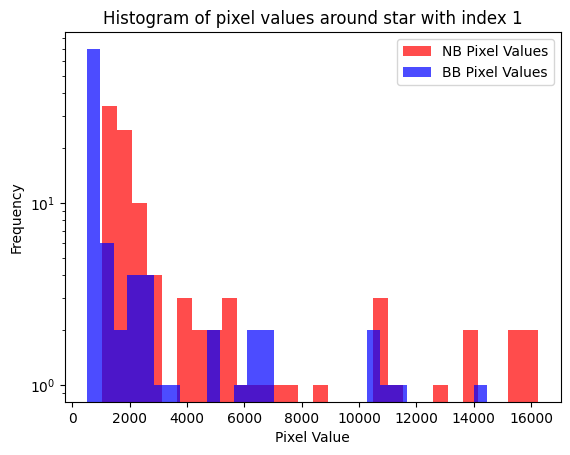

In [ ]:
hipparcus_filter.plotHistOfStar(1, nb, bb, print_brightest_pixels=True)
plt.yscale('log')

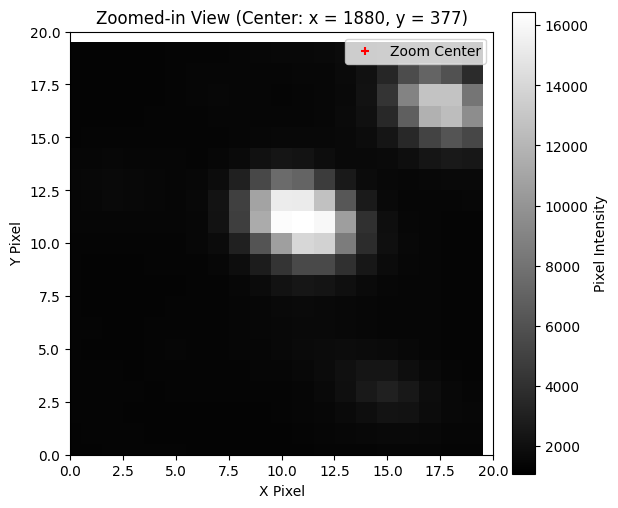

In [ ]:
nb.zoomToPoint(x = 1880.262945, y = 377.729570, zoom_size = 10)


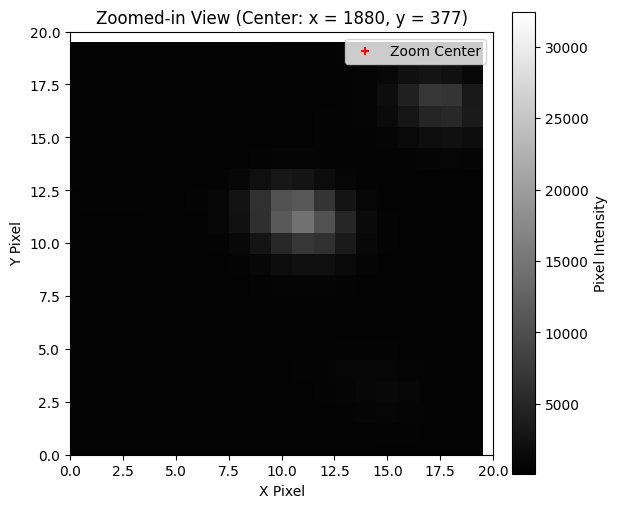

In [ ]:
bb.zoomToPoint(x = 1880, y = 377, zoom_size = 10)


In [ ]:
resultImg = Image.subtract(nb, bb, 1.4)

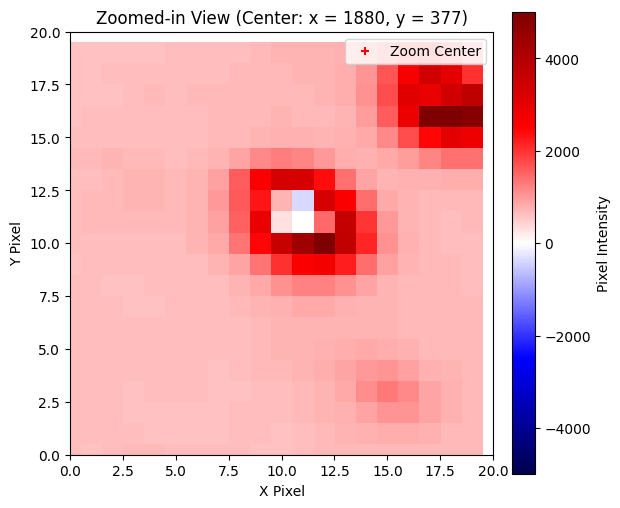

In [ ]:
resultImg.zoomToPoint(x = 1880, y = 377, zoom_size = 10, custom_cmap="seismic", custom_vmin=-5000, custom_vmax=5000)

In [ ]:
hipparcus_filter.plotHistOfStar(0, resultImg, resultImg, print_brightest_pixels=True)
plt.yscale('log')

### Test Setting visible stars

In [ ]:
hipparcus_filter.setVisibleStars(nb)
hipparcus_visible_stars = hipparcus_filter.getVisibleStars()
tycho_filter.setVisibleStars(nb)

print(hipparcus_visible_stars)
print(hipparcus_visible_stars.shape)

### Test removing visible stars from given image

In [ ]:
filtered_nb = hipparcus_filter.removeVisibleStars(nb, region_size=5)

plt.show()
nb.setLabeledStars(hipparcus_filter)
nb.plot(showLabeledStars = True, labelCircleSize=15, labelCircleColor='g')
filtered_nb.setLabeledStars(hipparcus_filter)
filtered_nb.plot(showLabeledStars = True, labelCircleSize=15, labelCircleColor='g')
print(hipparcus_filter.getVisibleStars())

In [ ]:
nb.zoomToPoint(x = 865, y = 1095, custom_cmap = "turbo")
filtered_nb.zoomToPoint(x = 865, y = 1095, custom_cmap = "turbo")

### Test all encompassing StarsFilter Function

In [ ]:
newNB = Image('data/bs_h_ave_wcs.fits')
simple_filter = StarsFilter(data_directory_path="data")
newNB.cropPixels(50, -50, 50, -50)
filteredNB = simple_filter.filterStars(newNB)
plt.show()
newNB.setLabeledStars(simple_filter)
newNB.plot(showLabeledStars = True, labelCircleSize=15, labelCircleColor='g')
filteredNB.setLabeledStars(simple_filter)
filteredNB.plot(showLabeledStars = True, labelCircleSize=15, labelCircleColor='g')

### Final Test

In [ ]:
# Simple example in order to do the following
# 1. Load in images and crop in by a certain amount of pixels either side
# 2. Get the optimal mu from the base images
# 3. Filter the stars from each image
# 4. Do the final subtraction with the filtered images and optimal mu
# 5. Plot

# 1. 
nb_img = Image("data/bs_h_ave_wcs.fits")
bb_img = Image("data/bs_r_ave_wcs.fits")

nb_img.cropPixels(100, -100, 100, -100)
bb_img.cropPixels(100, -100, 100, -100)

# 2.
mufinder = MuFinder(nb_img, bb_img, mu_resolution = 0.05)
optimal_mus = mufinder.getOptimalMus()

# 3.
starsFilter = StarsFilter()
starsFilter.setCatalogue(catalogue_id="I/259/tyc2", ra_col_name="RA(ICRS)", dec_col_name="DE(ICRS)", app_mag_col_name="VTmag")
filtered_nb = starsFilter.filterStars(nb_img)
filtered_bb = starsFilter.filterStars(bb_img)

# 4.
result_img = Image.subtract(filtered_nb, filtered_bb, optimal_mus[0])

# 5.
result_img.plot(cmap = 'viridis')